# Dataset

https://www.kaggle.com/datos_estudiantessets/kundanbedmutha/exam-score-prediction-dataset?resource=download

# Imports

Cargamos las librerias más importantes al principio

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

#Definimos la semilla
np.random.seed(42)

# Carga del dataset

Cargamos del dataset con pandas

In [27]:
datos_estudiantes = pd.read_csv("Datasets/Exam_Score_Prediction.csv", sep=',', index_col="student_id")
datos_estudiantes.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
student_id,,,,,,,,,,,,
1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


Si le echamos un vistazo podemos ver que hay columnas que no son numéricas.

En este caso estas variables no numéricas hay que codificarlas en número para poder introducirlas en la red neuronal

También hay que tener en cuenta que hay algunas variables como "facility_rating" que tienen orden por lo que hay que representarlo al realizar la codificación.

In [28]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

gender_encoder = LabelEncoder()
gender_encoder.fit(datos_estudiantes['gender'])
datos_estudiantes['gender'] = gender_encoder.transform(datos_estudiantes['gender'])
print("Gender codification")
print(list(gender_encoder.classes_))

course_encoder = LabelEncoder()
course_encoder.fit(datos_estudiantes['course'])
datos_estudiantes['course'] = course_encoder.transform(datos_estudiantes['course'])
print("\nCourse codification")
print(list(course_encoder.classes_))

internet_access_encoder = OrdinalEncoder(categories=[['no', 'yes']])
internet_access_encoder.fit(datos_estudiantes[['internet_access']])
datos_estudiantes['internet_access'] = internet_access_encoder.transform(datos_estudiantes[['internet_access']])
print("\nInternet Access codification")
print(internet_access_encoder.categories_)

sleep_quality_encoder = OrdinalEncoder(categories=[['poor', 'average', 'good']])
sleep_quality_encoder.fit(datos_estudiantes[['sleep_quality']])
datos_estudiantes['sleep_quality'] = sleep_quality_encoder.transform(datos_estudiantes[['sleep_quality']])
print("\nSleep Quality codification")
print(sleep_quality_encoder.categories_)

study_method_encoder = LabelEncoder()
study_method_encoder.fit(datos_estudiantes['study_method'])
datos_estudiantes['study_method'] = study_method_encoder.transform(datos_estudiantes['study_method'])
print("\nStudy Method codification")
print(list(study_method_encoder.classes_))

facility_rating_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
facility_rating_encoder.fit(datos_estudiantes[['facility_rating']])
datos_estudiantes['facility_rating'] = facility_rating_encoder.transform(datos_estudiantes[['facility_rating']])
print("\nFacility Rating codification")
print(facility_rating_encoder.categories_)

exam_difficulty_encoder = OrdinalEncoder(categories=[['easy', 'moderate', 'hard']])
exam_difficulty_encoder.fit(datos_estudiantes[['exam_difficulty']])
datos_estudiantes['exam_difficulty'] = exam_difficulty_encoder.transform(datos_estudiantes[['exam_difficulty']])
print("\nExam Difficulty codification")
print(exam_difficulty_encoder.categories_)

Gender codification
['female', 'male', 'other']

Course codification
['b.com', 'b.sc', 'b.tech', 'ba', 'bba', 'bca', 'diploma']

Internet Access codification
[array(['no', 'yes'], dtype=object)]

Sleep Quality codification
[array(['poor', 'average', 'good'], dtype=object)]

Study Method codification
['coaching', 'group study', 'mixed', 'online videos', 'self-study']

Facility Rating codification
[array(['low', 'medium', 'high'], dtype=object)]

Exam Difficulty codification
[array(['easy', 'moderate', 'hard'], dtype=object)]


In [29]:
datos_estudiantes.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
student_id,,,,,,,,,,,,
1,17,1,6,2.78,92.9,1.0,7.4,0.0,0,0.0,2.0,58.9
2,23,2,5,3.37,64.8,1.0,4.6,1.0,3,1.0,1.0,54.8
3,22,1,1,7.88,76.8,1.0,8.5,0.0,0,2.0,1.0,90.3
4,20,2,6,0.67,48.4,1.0,5.8,1.0,3,0.0,1.0,29.7
5,20,0,6,0.89,71.6,1.0,9.8,0.0,0,0.0,1.0,43.7


# Visualizacion de algunas variables

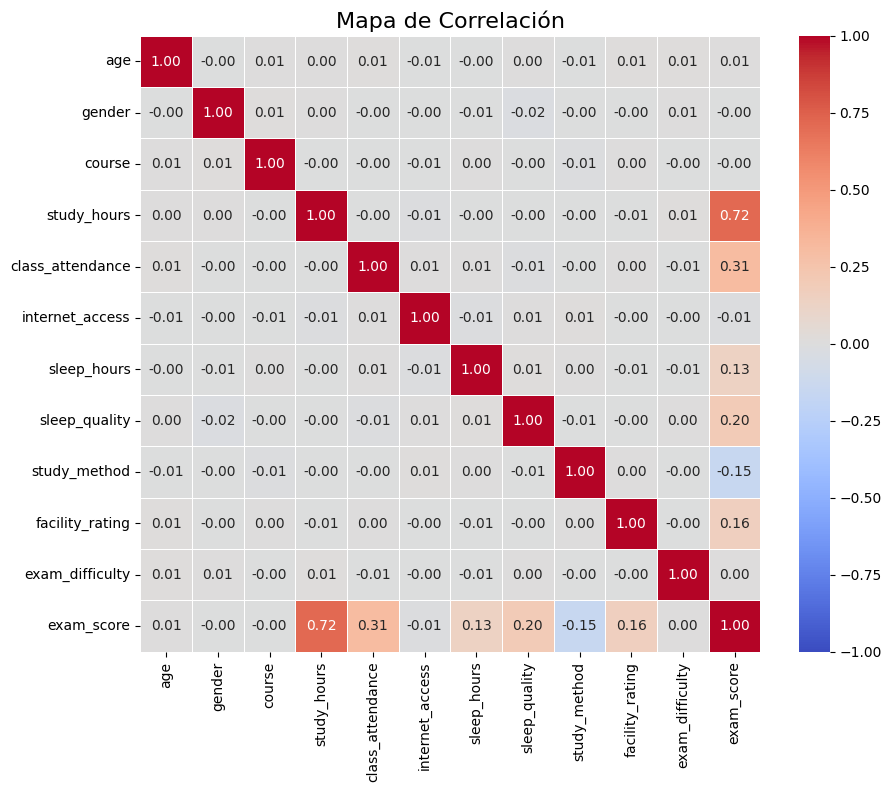

In [30]:
matriz_correlacion = datos_estudiantes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Mapa de Correlación', fontsize=16)
plt.show()

# Regresion con redes neuronales

Realizamos la division del dataset en entrenamiento, validacion y prueba

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().set_output(transform="pandas")
y_scaler = MinMaxScaler().set_output(transform="pandas")

X = datos_estudiantes.drop(['exam_score'], axis=1)
y = datos_estudiantes['exam_score']

X_scaled, y_scaled = X_scaler.fit_transform(X), y_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y_scaled, test_size=0.20, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.70, random_state=42
)

In [32]:
def compila_modelo(modelo, optimizer, lr=1e-3):
    opt = optimizer(learning_rate=lr)
    modelo.compile(
        optimizer=opt,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[
            tf.keras.metrics.RootMeanSquaredError,
            tf.keras.metrics.MeanAbsoluteError,
            tf.keras.metrics.R2Score(),
        ]
    )
    return modelo

def entrena_y_evalua(modelo, X_train, y_train, X_val, y_val, X_test, y_test,
                     epochs=80, batch_size=256, callbacks=None, verbose=0):
    history = modelo.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks or [],
        verbose=verbose
    )

    # Evaluación final en test
    test = modelo.evaluate(X_test, y_test, verbose=0)

    metrics = dict()

    for nombre, valor in zip(["MSE", "RMSE", "MAE", "R2"], test):
        metrics[nombre] = valor

    return history, metrics

def plot_history(history, titulo="Entrenamiento"):
    h = history.history
    epochs = np.arange(1, len(h["loss"]) + 1)

    # Loss
    plt.figure(figsize=(12, 5))
    plt.grid(True)
    plt.plot(epochs, h["loss"], "--", linewidth=2, label="loss train")
    plt.plot(epochs, h["val_loss"], "-", linewidth=2, label="loss val")
    plt.title(titulo + " | Loss")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure(figsize=(12, 5))
    plt.grid(True)
    plt.plot(epochs, h["root_mean_squared_error"], "--", linewidth=2, label="RMSE train")
    plt.plot(epochs, h["val_root_mean_squared_error"], "-", linewidth=2, label="RMSE val")
    plt.title(titulo + " | RMSE")
    plt.xlabel("Época")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

def plot_pred(y_real, y_pred):
    errores = np.abs(y_real - y_pred)

    fig, ax1 = plt.subplots(1, 1, figsize=(14, 6))
    sc = ax1.scatter(y_real, y_pred, c=errores, cmap='Reds', s=100, edgecolors='k')
    ax1.plot([0, 100], [0, 100], 'k--', alpha=0.5, label='Predicción Perfecta')

    ax1.set_title('Precisión General del Modelo', fontsize=14)
    ax1.set_xlabel('Nota Real', fontsize=12)
    ax1.set_ylabel('Nota Predicha', fontsize=12)
    ax1.set_xlim(0, 105)
    ax1.set_ylim(0, 105)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    cbar = plt.colorbar(sc, ax=ax1)
    cbar.set_label('Magnitud del Error')

    plt.show()

### Modelo A

In [ ]:
def build_model_A(input_dim):
    entrada = tf.keras.layers.Input(shape=(input_dim,))
    x = tf.keras.layers.Dense(30, activation="relu")(entrada)
    x = tf.keras.layers.Dense(30, activation="relu")(x)
    salida = tf.keras.layers.Dense(1, activation="relu")(x)
    return tf.keras.Model(inputs=entrada, outputs=salida)

In [ ]:
modeloA = build_model_A(X_train.shape[1])
modeloA = compila_modelo(modeloA, tf.keras.optimizers.Adam, lr=1e-3)

histA, metricsA = entrena_y_evalua(
    modeloA, X_train, y_train, X_val, y_val, X_test, y_test,
    epochs=80, batch_size=512, verbose=1
)

In [ ]:
print(metricsA)

In [ ]:
plot_history(histA, "Modelo A (baseline)")
y_pred = modeloA.predict(X_test[:200])
y_pred_inv = y_scaler.inverse_transform(y_pred)
y_test_inv = y_scaler.inverse_transform(y_test[:200])
plot_pred(y_test_inv, y_pred_inv)

Tras esta primera prueba podemos ver varias cosas:

- Las siguientes méticas, que por si solas no significan nada, hay que hacer otra prueba para comparar:
  - 'MSE': 0.015351277776062489
  - 'RMSE': 0.12390027195215225
  - 'MAE': 0.10026712715625763
  - 'R2': 0.7240228652954102
- Más de la mitad de epochs no han servido de nada
  - Hay que parar cuando no se vea ganancia (EarlyStopping)
- Hay que probar con otros hiperparámetros para ver si hay mejora

### Modelo B

Para este modelo añadimos 1 capa, y modificamos el numero de neuronas por capa. También reducimos el learning rate.

Tras una prueba hemos visto que con el nuevo learning rate el early stopping no ha saltado, por lo que añadimos más epochs para capturar la máxima cantidad de información posible.

In [ ]:
def build_model_B(input_dim):
    entrada = tf.keras.layers.Input(shape=(input_dim,))
    x = tf.keras.layers.Dense(15, activation="relu")(entrada)
    x = tf.keras.layers.Dense(30, activation="relu")(x)
    x = tf.keras.layers.Dense(15, activation="relu")(x)
    salida = tf.keras.layers.Dense(1, activation="relu")(x)
    return tf.keras.Model(inputs=entrada, outputs=salida)

In [ ]:
modeloB = build_model_B(X_train.shape[1])
modeloB = compila_modelo(modeloB, tf.keras.optimizers.Adam, lr=1e-4)

histB, metricsB = entrena_y_evalua(
    modeloB, X_train, y_train, X_val, y_val, X_test, y_test,
    epochs=200, batch_size=256, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

In [ ]:
plot_history(histB, "Modelo B + Early Stopping")
y_pred = modeloB.predict(X_test[:200])
y_pred_inv = y_scaler.inverse_transform(y_pred)
y_test_inv = y_scaler.inverse_transform(y_test[:200])
plot_pred(y_test_inv, y_pred_inv)

Tras esta segunda prueba podemos ver las siguientes cosas:

- Nuevas métricas:
  - 'MSE': 0.015440128743648529
  - 'RMSE': 0.12425831705331802
  - 'MAE': 0.10006236284971237
  - 'R2': 0.7224255204200745
- Podemos ver que la curva de apredizaje es más suave.
- Comparando los errores con el modelo anterior, este es muy ligeramente peor (-0.0001 de diferencia en MSE)

### Modelo C

In [35]:
def build_model(input_dim, layer1, layer2, layer3, dropout):
    entrada = tf.keras.layers.Input(shape=(input_dim,))
    x = tf.keras.layers.Dense(layer1, activation="relu")(entrada)
    x = tf.keras.layers.Dense(layer2, activation="relu")(x)
    x = tf.keras.layers.Dense(layer3, activation="relu")(x)

    dropout = tf.keras.layers.Dropout(dropout)(x)
    salida = tf.keras.layers.Dense(1, activation="relu")(dropout)
    return tf.keras.Model(inputs=entrada, outputs=salida)

In [ ]:
import os
import itertools
from tqdm.notebook import tqdm


MODEL_FILENAME = "best_model.h5"
CSV_FILENAME = "res.csv"

grid_neuronas = list(itertools.combinations_with_replacement([16, 32, 64], 3))
grid_lr = [1e-2, 1e-3, 1e-4]
grid_dropout = [0.2, 0.3]
grid_opts = [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD]

grid_comb = list(itertools.product(grid_neuronas, grid_lr, grid_dropout, grid_opts))


if os.path.exists(CSV_FILENAME):
    df_resultados = pd.read_csv(CSV_FILENAME, index_col=0)
    print("Resultados anteriores cargados desde CSV.")
    print(f"Mejor RMSE: {df_resultados['rmse'].min():.4f}")
        
else:
    print(f"Iniciando Grid Search ({len(grid_comb)} combinaciones")
    
    resultados = []
    best_rmse = float('inf')
    best_model = None
    best_params = {}

    pbar = tqdm(grid_comb, desc="Entrenando modelos")

    for (layer1, layer2, layer3), lr, dropout, opt in pbar:
        
        modelo_temp = build_model(X_train.shape[1], layer1, layer2, layer3, dropout)
        
        modelo_temp = compila_modelo(modelo_temp, opt, lr=lr)

        hist, metrics = entrena_y_evalua(
            modelo_temp, X_train, y_train, X_val, y_val, X_test, y_test,
            epochs=200,
            batch_size=512,
            verbose=0, 
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
        )
        
        current_rmse = metrics['RMSE']
        current_r2 = metrics['R2']

        res = {
            'neuronas': (layer1, layer2, layer3),
            'dropout': dropout,
            'lr': lr,
            'opt': opt.__name__,
            'rmse': metrics['RMSE'],
            'r2': metrics['R2']
        }
        
        resultados.append(res)

        if current_rmse < best_rmse:
            best_rmse = current_rmse
            best_model = modelo_temp
            best_params = res
            
        pbar.set_postfix({'Best RMSE': f'{best_rmse:.4f}', 'Last RMSE': f'{current_rmse:.2f}'})


    print(f"\n GRID SEARCH FINALIZADO")
    print(f"Mejor RMSE: {best_rmse:.4f}")
    print(f"Mejores parámetros: {best_params}")

    df_resultados = pd.DataFrame(resultados).sort_values(by='rmse')
    print("\nMejores configuraciones:")
    print(df_resultados.head())

    df_resultados.to_csv(CSV_FILENAME)
    print("Datos guardados")

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0430 - mean_absolute_error: 0.1581 - r2_score: 0.2231 - root_mean_squared_error: 0.2073 - val_loss: 0.0171 - val_mean_absolute_error: 0.1046 - val_r2_score: 0.6867 - val_root_mean_squared_error: 0.1308
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0210 - mean_absolute_error: 0.1160 - r2_score: 0.6199 - root_mean_squared_error: 0.1450 - val_loss: 0.0160 - val_mean_absolute_error: 0.1013 - val_r2_score: 0.7075 - val_root_mean_squared_error: 0.1264
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0191 - mean_absolute_error: 0.1107 - r2_score: 0.6546 - root_mean_squared_error: 0.1382 - val_loss: 0.0164 - val_mean_absolute_error: 0.1025 - val_r2_score: 0.7003 - val_root_mean_squared_error: 0.1280
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.1099 - r2_score: 0.6594 - root_mean_squared_error: 0.1372 - val_loss: 0.0164 - val_mean_absolute_error: 0.1030 - val_r2

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


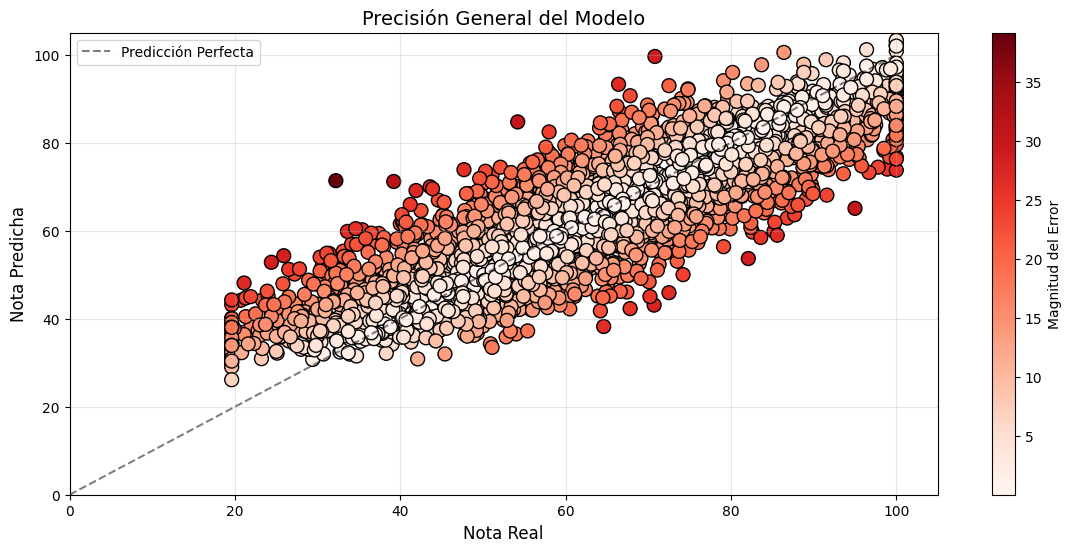

In [44]:
best_model = build_model(X_train.shape[1], 32, 32, 64, 0.2)
best_model = compila_modelo(best_model, tf.keras.optimizers.Adam, lr=1e-2)
hist, metrics = entrena_y_evalua(
    best_model, X_train, y_train, X_val, y_val, X_test, y_test,
    epochs=200,
    batch_size=512,
    verbose=1, 
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

y_pred = best_model.predict(X_test)
y_pred_inv = y_scaler.inverse_transform(y_pred)
y_test_inv = y_scaler.inverse_transform(y_test)
plot_pred(y_test_inv, y_pred_inv)